In [1]:
#dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

database_path = "Resources/hawaii.sqlite"

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = engine.execute('SELECT max(date) FROM Measurement').fetchall()
most_recent

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data
# and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent = date(2017, 8, 23)

year = timedelta(days=365)

less_recent = most_recent - year
less_recent.isoformat()

print(f"Date one year from last date in data set: {less_recent}")

Date one year from last date in data set: 2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores

measurement = (Measurement.date, Measurement.prcp)

prcp_oneyear = session.query(*measurement).\
    filter(Measurement.date >= less_recent).filter(Measurement.prcp != 'None').all()

prcp_oneyear[:15]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0)]

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_oneyear_df = pd.DataFrame(prcp_oneyear,columns=['Date','Precipitation'])
prcp_oneyear_df.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [13]:
# Sort the dataframe by date
prcp_oneyear_df['Date']= pd.to_datetime(prcp_oneyear_df.Date)
prcp_oneyear_df.set_index('Date')
prcp_oneyear_df.sort_index()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2016,2017-08-17,0.13
2017,2017-08-19,0.09
2018,2017-08-21,0.56
2019,2017-08-22,0.50


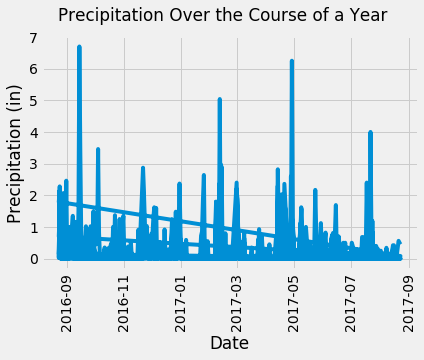

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prcp_oneyear_df['Date'], prcp_oneyear_df['Precipitation'])
plt.xticks(rotation='vertical')
plt.suptitle("Precipitation Over the Course of a Year")
plt.ylabel("Precipitation (in)")
plt.xlabel("Date")


plt.savefig("precipitation.png")
plt.show()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_oneyear_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()